In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from imports.loss import *
from imports.algorithm import *
from imports.scenarios import *
from imports.plot import *

from IPython.display import HTML

In [2]:
NUM_AGENTS = 5
VARS_DIM = 2
LOSS_TARGET_WEIGHT = 1.0
LOSS_BARYCENTER_WEIGHT = 1.0
AGENTS_IMPORTANCE = [1.0] * NUM_AGENTS
# AGENTS_IMPORTANCE = [3.0, 0.5, 0.5, 0.5, 0.5]

SEED = 42
rng = np.random.default_rng(SEED)

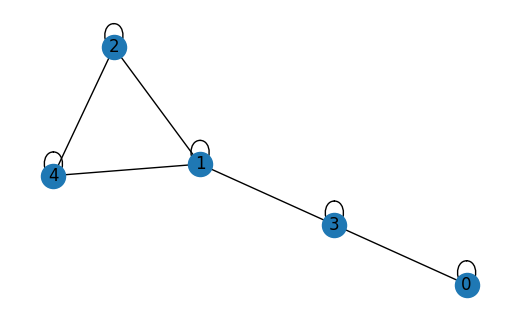

In [3]:
%matplotlib inline
G, A = create_network_of_agents(
    NUM_AGENTS,
    graph_form = "binomial_graph",
    seed = int(rng.integers(0, 2**32)),
    dtype = np.float64
)
agents, targets_pos = create_aggregative_problem(NUM_AGENTS, VARS_DIM, LOSS_TARGET_WEIGHT, LOSS_BARYCENTER_WEIGHT, AGENTS_IMPORTANCE, SEED)
z0 = rng.random(size=(NUM_AGENTS, VARS_DIM))


plt.figure(figsize=(5, 3))
nx.draw_kamada_kawai(G, with_labels=True)
plt.show()

In [4]:
history_z, history_sigma, history_v = aggregative_optimization(
    agents = agents, 
    z0 = z0, 
    A = A, 
    alpha = 1e-2, 
    num_iters = 5000
)

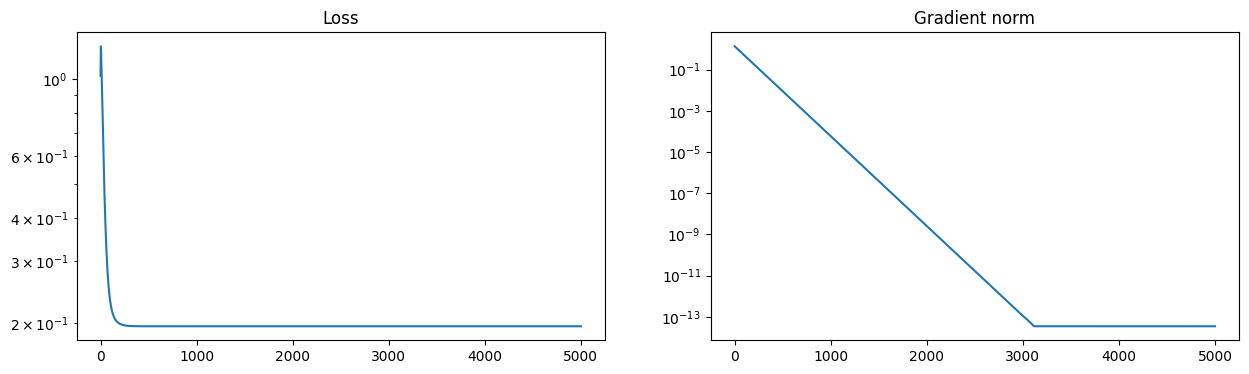

In [5]:
%matplotlib inline

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plot_loss(agents, history_z, history_sigma, "")
plt.title("Loss")

plt.subplot(1, 2, 2)
plot_gradient(agents, history_z, history_sigma, history_v, "")
plt.title("Gradient norm")

plt.show()

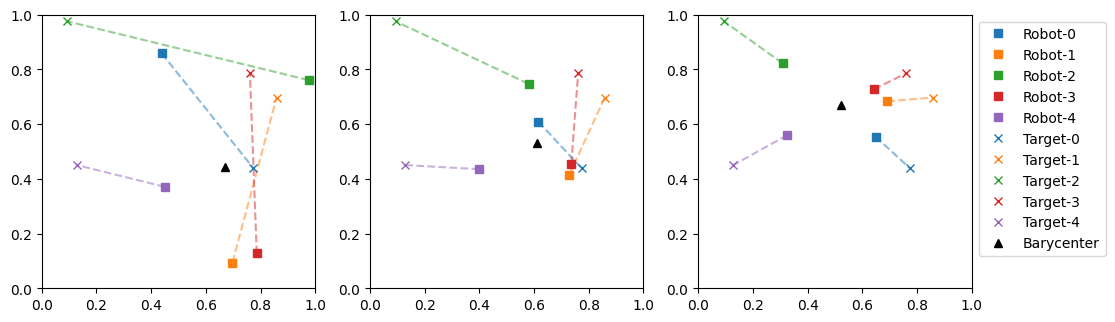

In [6]:
%matplotlib inline
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plot_scenario(agents, history_z[0], targets_pos, show_legend=False)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplot(1, 3, 2)
plot_scenario(agents, history_z[50], targets_pos, show_legend=False)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.subplot(1, 3, 3)
plot_scenario(agents, history_z[-1], targets_pos)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.show()

In [7]:
%matplotlib notebook
anim = plot_animation(
    agents,
    history_estimates = history_z[:1000], 
    targets_pos = targets_pos, 
    ff_threshold = 150,
    sample_size = 100
)
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>